<a href="https://colab.research.google.com/github/AnkitPatel745/Text-Data-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# improting reqired library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the file
# Parse Error can be removed by ("error_bad_lines")
comment = pd.read_csv('/content/drive/MyDrive/Data Science Project(Self)/EDA Projects/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [5]:
# First look 
comment.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [6]:
#!pip install textblob
from textblob import TextBlob

In [7]:
# Look for polarity of the first comment
TextBlob("It's more accurate to call it the M+ (1000) be...	").sentiment.polarity

0.45000000000000007

In [8]:
# Finding any null value
comment.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [9]:
# dropping null value
comment.dropna(inplace=True)

In [10]:
# Appendding polarity value 
polarity=[]
for i in comment['comment_text']:
   polarity.append(TextBlob(i).sentiment.polarity)

In [11]:
# Creating new polarity column
comment['polarity']=polarity

In [12]:
# First look
comment.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [13]:
# Consider only polarity 1 value
comment_positive = comment[comment['polarity']==1]

In [14]:
comment_positive.shape

(20400, 5)

In [15]:
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

In [16]:
# Unique Value
stopwords=set(STOPWORDS)

In [17]:
# Joining The Positive Comment 
total_comment=' ' .join(comment_positive['comment_text'])

In [18]:
# This data Is Too big in the github so comment it 
#total_comment

In [19]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

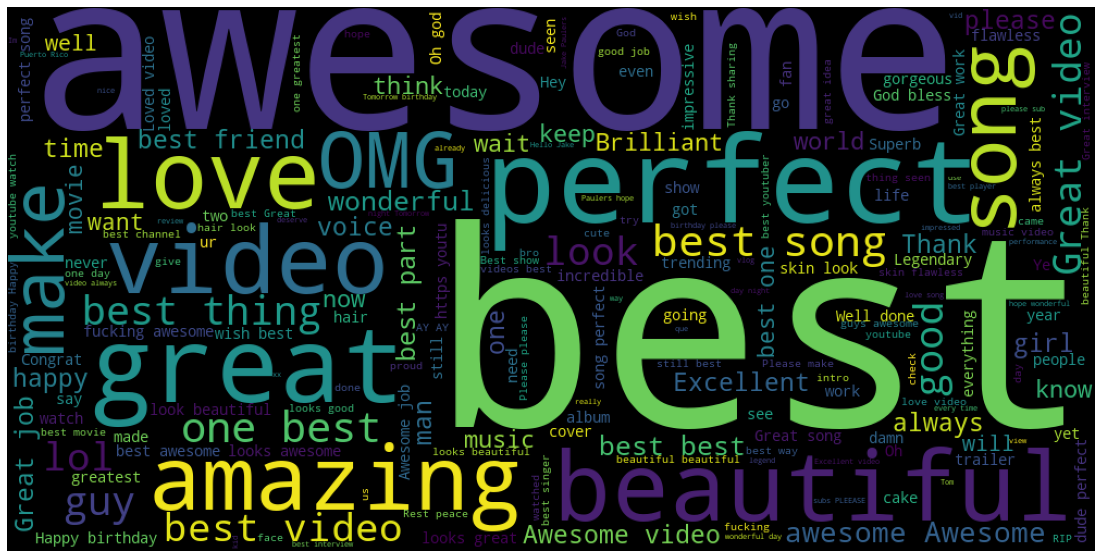

In [20]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

In [21]:
# Consider only polarity -1 value
comment_negative = comment[comment['polarity']==-1]

In [22]:
# Joining The Nagative Comment 
total_comment=' ' .join(comment_negative['comment_text'])

In [23]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

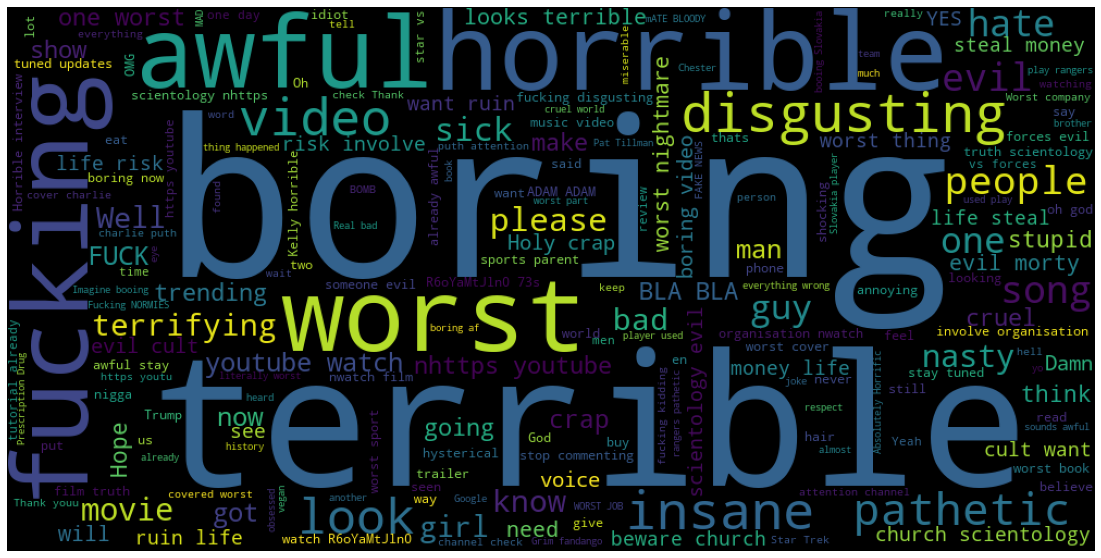

In [24]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

## **Q1...  Analysing Tag Column , What Are The Trending Tags On YouTube ??**

In [25]:
## Path Of The Data
videos = pd.read_csv('/content/drive/MyDrive/Data Science Project(Self)/EDA Projects/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [26]:
# First Look
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [27]:
# first look to the tags column only
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [28]:
# Joining The all Tags in the form of string
tags_string = ' '.join(videos['tags'])

In [29]:
# First look After Joining Tags
#tags_string

####**Conclusion**
The Given Tags Column contain some Noise or Special Charaters Which must be cleaned of before futher analysis.

In [30]:
# Importing The Regular Experession
import re

In [31]:
# substituting  the sapace in case of special charater or Noise
tags = re.sub('[^a-zA-Z]'," ",tags_string)

In [32]:
# first look
#tags

In [33]:
# Removing The Extra Space From The String
tags = re.sub(' +',' ',tags)

In [34]:
# First Look
#tags

In [35]:
# From the Word Cloud unique words in the tags 
wordcloud = WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

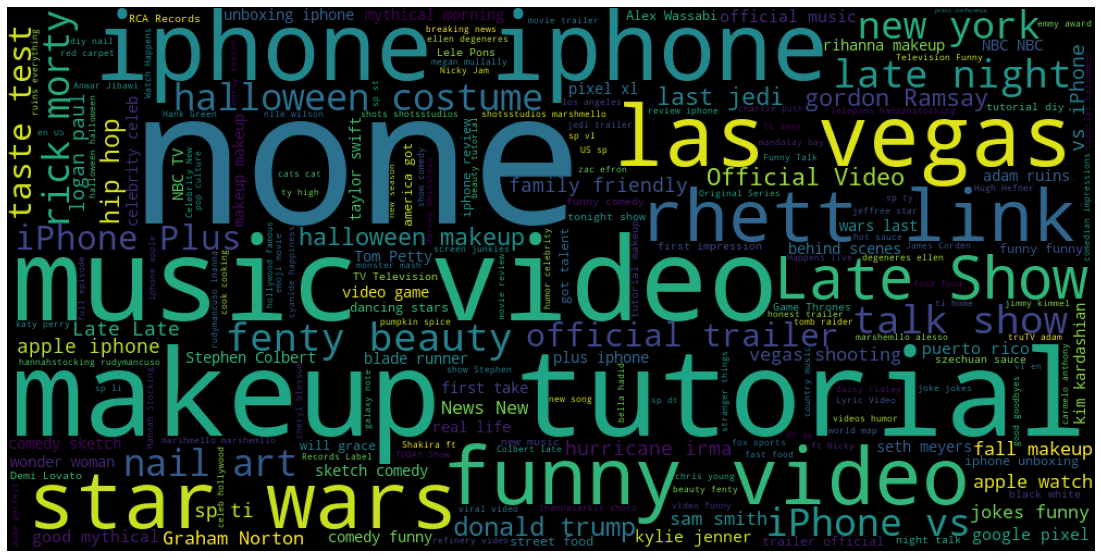

In [36]:
# Plotting the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

###**Q.2...Perform Analysis On Likes, Videos & Dislikes and Find How They Are Correlated To Each Other ???**

Text(0.5, 1.0, 'Regression Plot B/W Like & Views')

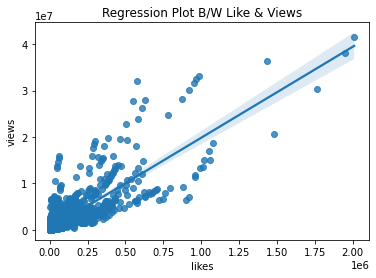

In [37]:
# Regression Plot
sns.regplot(data=videos,x='likes',y='views')
plt.title("Regression Plot B/W Like & Views")


Text(0.5, 1.0, 'Regression Plot B/W DisLike & Views')

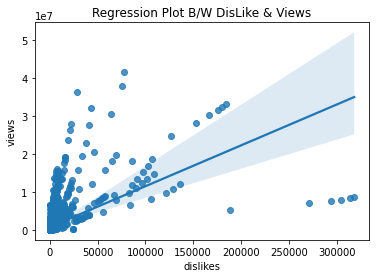

In [38]:
# Regression Plot
sns.regplot(data=videos,x='dislikes',y='views')
plt.title("Regression Plot B/W DisLike & Views")

In [39]:
df_corr = videos[['views','likes','dislikes']]

In [40]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

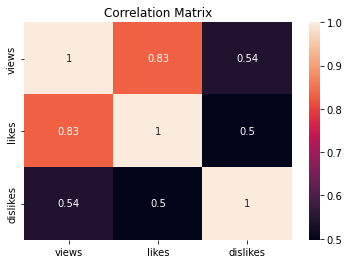

In [41]:
# Heat Map
sns.heatmap(df_corr.corr(),annot=True)
plt.title("Correlation Matrix")

###**Q....-> Analysis Of Emoji's In Comments...???**

In [43]:
# First look
comment.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [44]:
# Need to Extract Emojis Form the comment_tag
comment['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [48]:
# Installing The Libarary
pip install emoji   

     |████████████████████████████████| 170 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=88526a43790cfb5ee5a9bc0654e1e07183bff2373834aadc1bef18d8bd179332
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [49]:
# Importing Libarary
import emoji